# Project 4

## Part 1: Image Classification

We will use the Fasion MNIST dataset available in torchvision.datasets.FashionMNIST for training our model. Fashion MNIST has 10 classes and 60000 train + validation images and 10000 test images. The architecture of your neural network should be 2 conv layers, 32 channels each, where each conv layer will be followed by a ReLU followed by a maxpool. This should be followed by 2 fully connected networks. Apply ReLU after the first fc layer (but not after the last fully connected layer). You should play around with different kinds of non linearities and differetn number of channels to improve your result.

Results: Once you have trained your model, show the following results for the network:
 - Plot the train and validation accuracy during the training process.
 - Compute a per class accuracy of your classifier on the validation and test dataset. Which classes are the hardest to get? Show 2 images from each class which the network classifies correctly, and 2 more images where it classifies incorrectly.
 - Visualize the learned filters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import warnings
warnings.filterwarnings('ignore')

2.1.0


In [3]:
# import data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [124]:
catagories = ['shirt', 'pants', 'sweater', 'dress', 'coat', 'sandle', 'dress_shirt', 'sneaker', 'bag', 'boot']
train_images, test_images = train_images.astype('float32')/255, test_images.astype('float32')/255

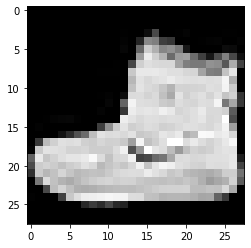

In [13]:
plt.imshow(train_images[0], cmap='gray')

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout
_, img_height, img_width, _ = train_images.shape

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (img_height, img_width, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [115]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)            

In [125]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

train_image_generator = ImageDataGenerator() 
validation_image_generator = ImageDataGenerator() 

train_gen = train_image_generator.flow(train_images, y_train, batch_size = BATCH_SIZE)
test_gen =validation_image_generator.flow(test_images, y_test, batch_size=BATCH_SIZE)


In [126]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1568)            

In [127]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [128]:
#y_train = tf.keras.utils.to_categorical(train_labels)
#y_test = tf.keras.utils.to_categorical(test_labels)
epochs = train_images.shape[0]//BATCH_SIZE
history = model.fit(train_gen, validation_data=test_gen, epochs=epochs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1875 steps, validate for 313 steps
Epoch 1/1875
1875/1875 [==============================] - 58s 31ms/step - loss: 2.3029 - accuracy: 0.0959 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/1875
1875/1875 [==============================] - 62s 33ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/1875
1875/1875 [==============================] - 65s 35ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/1875
1875/1875 [==============================] - 65s 35ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/1875
1875/1875 [==============================] - 64s 34ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/1875
1875/1875 [==============================] - 65s 35ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/1875
1875

KeyboardInterrupt: 

In [129]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [140]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)


In [141]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1568)            

In [142]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [143]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] 